In [4]:
from chem_ocean.ocean_data import dataFetcher

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd

In [ ]:
# @todo: must fix the data import to accomodate multiple tracers
    # update: does using cluster_d, but not fully masked 
# @todo: add function for loading data into a dataframe (for seaborn)
    # update: fix cluster_d to have all columns reflect dropna masking will resolve this

The concentration of phosphate in the deep ocean reflects a combination of the amount of phosphate present in the water at the time of water formation, and the amount contributed by regenerated organic matter (phytoplankton that have died, sunk to some depth, and dissolved into constituent molecules).  In 1998, Broecker et al. published a paper suggesting the use of a calculated tracer, PO$_4$* that refleced the concentration of preformed nutrients (the concentration present in the water at the time of water formation).  Their argument was that this would act as a conservative tracer because the non-conservative portion corrected for in the calculation, and could be used to trace the relative contributions of different watermasses at a given location.

The formula they put forth was quite simple:
PO$_4$* = PO$_4$ + O$_2$/175 -1.95

where 175 is the global average moles of oxygen per molecule PO$_4$ needed to respire marine organic matter.  In the 1998 paper, Broecker et al. stipulate that PO$_4$* is only conservative to the extent that the O$_2$/PO$_4$ respiration ratio is constant.

In the subsequent years (as well as those preceding, to a degree) there has been ongoing discussion about this ratio, indeed in Rae and Broecker (2018) which notes that the mixing ratio of North Atlantic sourced water and Southern sourced water in the Pacific derived from PO4* does not match the mixing ratio calculated based on salinity (another conservative tracer).    

In [29]:
tracers = ['phosphate', 'oxygen']
tracer_string = ','.join(tracers)
dataset_Atl = dataFetcher()
dataset_Atl.return_from_psql('SELECT latitude, longitude, depth, {} from woa13 WHERE longitude < 15 and longitude >-70 '.format(tracer_string),['latitude', 'longitude', 'depth']+tracers, tracers, 'longitude', 'latitude')

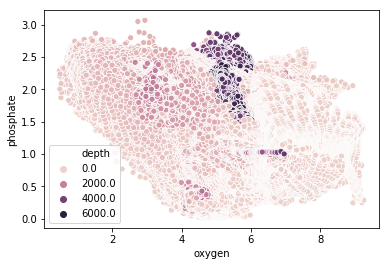

In [33]:
df_Atl = pd.DataFrame(dataset_Atl.cluster_d)
sns.scatterplot(x ='oxygen', y= 'phosphate', data = df_Atl, hue = 'depth')

In [21]:
tracers = ['phosphate', 'oxygen']
tracer_string = ','.join(tracers)
dataset_NA = dataFetcher()
dataset_NA.return_from_psql('SELECT latitude, longitude, depth, {} from woa13 WHERE latitude > 50 and longitude < 15 and longitude >-70 and depth>=3000'.format(tracer_string),['latitude', 'longitude', 'depth']+tracers, tracers, 'longitude', 'latitude')

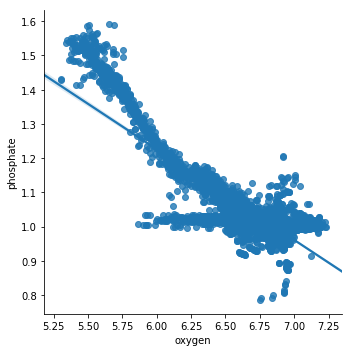

In [26]:
df_NAtl = pd.DataFrame(dataset_NA.cluster_d)
sns.lmplot(x ='oxygen', y= 'phosphate', data = df_NAtl)

In [ ]:
n, bins, patches = ax_out[ik].hist(dataset_NA._feat_data, 20, color =  tracers[tracer][2], alpha = 1)


    dataset_SA = dataFetcher()
    dataset_SA.return_from_psql('SELECT latitude, longitude, depth, {} from woa13 WHERE latitude <-50 and longitude < 15 and longitude >-70 and depth>=4000'.format(tracer),['latitude', 'longitude', 'depth', tracer], [tracer], 'longitude', 'latitude')
    n, bins, patches = ax_out[ik].hist(dataset_SA._feat_data, 20, color =  tracers[tracer][2], alpha = 1)

